In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
import sys
sys.path.append("/home/tom/coding/ExTRApack")
import ExTRA as ex

ExTRA correctly imported


In [3]:
##HIP20601 RV only

In [4]:
with open("ExTRA/data/astrometry/HIP/Main_Cat.d") as f:
    HIP_solutions=[]
    for line in f:
        line=line.strip()
        line=line.split()
        
        stand=line[4:9]
        stand.insert(0,line[0])

        stand[1]=np.degrees(float(stand[1]))
        stand[2]=np.degrees(float(stand[2]))
        for i in range(1,len(stand)):
            stand[i]=float(stand[i])
        HIP_solutions.append(stand) #HIP_ident,Asc,dec,parallax,muasc,mudec

        
    

117955

In [6]:
with open("ExTRA/data/RV/HIP20601.txt") as f:
    f.readline()
    RV20601=[]
    for line in f:
        line=line.strip()
        line=line.split()
        RV20601.append(line[1:][0:3])
RV20601.remove(RV20601[1])
RV20601.remove(RV20601[-1])
for i in range(len(RV20601)):
    RV20601[i]=list(map(float,RV20601[i]))


RV20601=np.transpose(np.array(RV20601))

In [7]:
HIP_identifier=[list(i) for i in zip(*HIP_solutions)][0]
gaia20601=[66.1805500342731,4.699962521773162,17.30846832872689,99.24938362502657,3.061630842967268]
HIP20601_sol=HIP_solutions[HIP_identifier.index("20601")][1:]
HIP20601,t_HIP20601=ex.read_hip("ExTRA/data/astrometry/HIP/HIP020601.d")#Astrometric data, second reduction

In [8]:
###############
RV20601[0]

array([55532.4785, 56243.514 , 56323.2404, 56323.3136, 56323.3628,
       56323.4538, 56323.5101, 56324.2438, 56324.4318, 56324.4718,
       56619.5265, 57009.4242, 57295.6072, 57729.4798, 57734.4367,
       57744.4419])

In [9]:
t_test=np.linspace(RV20601[0][0],RV20601[0][-1],100)
testarray=10,20,100,0.2,0,56000

RV_test=np.array([t_test,ex.RV_solo(*testarray,t_test),np.ones(len(t_test))])

In [10]:
def fittingRV(x,RV,s=0):

    
    t_RVs,RVs,RVs_err=RV
    v,K,P,e,om,T0=x


    

    v0=np.array(v)
    
    

    L=ex.L_RVs(RVs,RVs_err,s,v0,K,P,e,om,T0,t_RVs)
    
    
    

    return L

In [11]:

#10,20,100,0.2,0,56000
initital=[30,50,150,0.75,0,56636.67055]
bnds=[(None,None),(10,None),(130,170),(0.1,0.95),(-2*np.pi,+2*np.pi),(0,None)]
popt=minimize(fittingRV,initital,args=(RV20601),bounds=bnds,method="L-BFGS-B",tol=1e-10,options={"maxiter":1000000})
popt

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 78387.20048705596
        x: [ 4.093e+01  3.760e+01  1.561e+02  8.016e-01 -2.893e+00
             5.664e+04]
      nit: 119
      jac: [-1.266e-01  7.276e-02 -1.065e+00  1.026e+01 -4.526e-01
             3.159e-01]
     nfev: 1148
     njev: 164
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>

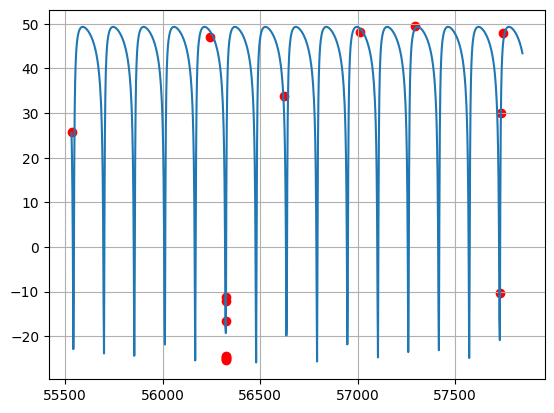

In [12]:
test=popt.x
t_model=np.linspace(RV20601[0][0],RV20601[0][-1]+100,1000)
aus=ex.RV_solo(test[0],test[1],test[2],test[3],test[4],test[5],t_model)
plt.plot(t_model,aus)
plt.scatter(RV20601[0],RV20601[1],color="r")

plt.grid()
plt.show()

In [13]:
################################################

In [14]:
with open("ExTRA/data/RV/HIP73408.txt") as f:
    f.readline()
    data=[]
    for line in f:
        line=line.strip()
        line=line.split()
        line=np.array(line)
        data.append(line)
        

    
    for i in range(len(data)):
        data[i]=list(map(float,data[i]))#
    data.remove(data[-1])
    data=np.transpose(np.array(data))

In [15]:
RV73408=data

In [16]:

#10,20,100,0.2,0,56000
initital=[30,50,1983,0.75,0,56636.67055]
bnds=[(None,None),(10,None),(0,None),(0.1,0.95),(-2*np.pi,+2*np.pi),(0,None)]
popt=minimize(fittingRV,initital,args=(RV73408),bounds=bnds,method="L-BFGS-B",tol=1e-10,options={"maxiter":1000000})
popt

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 549.1023791544985
        x: [ 3.907e+01  4.511e+02  1.981e+03  6.938e-01 -3.637e+00
             5.663e+04]
      nit: 60
      jac: [ 5.230e-04 -7.276e-04  3.922e-03  1.101e-01  2.303e-02
            -7.155e-02]
     nfev: 630
     njev: 90
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>

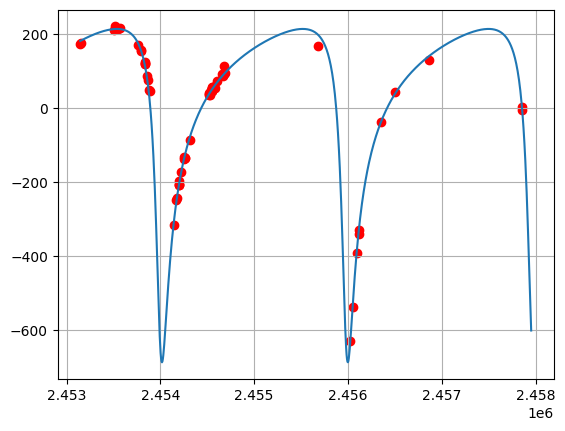

In [17]:
test=popt.x
t_model=np.linspace(RV73408[0][0],RV73408[0][-1]+100,1000)
aus=ex.RV_solo(test[0],test[1],test[2],test[3],test[4],test[5],t_model)
plt.plot(t_model,aus)
plt.scatter(RV73408[0],RV73408[1],color="r")

plt.grid()
plt.show()

In [18]:
###combiend RV and HIP for object HD131664//HIP73408

In [19]:
HIP_identifier=[list(i) for i in zip(*HIP_solutions)][0]
gaia73408=[225.02545916436947,-73.5352313824916,19.135968616483847,8.00778860394346,22.284477867081716]
HIP73408_sol=HIP_solutions[HIP_identifier.index("73408")][1:]
HIP73408,t_HIP73408=ex.read_hip("ExTRA/data/astrometry/HIP/HIP073408.d")#Astrometric data, second reduction

In [20]:
HIP73408_sol

[225.02518276206374, -73.53540927784609, 17.75, 14.62, 28.86]

In [21]:
def fitting(x,RV,HIP,HIP_sol,gaia):

    
    t_RVs,RVs,RVs_err=RV
    v,D_asc,D_dec,D_parallax,D_mu_a_star,D_mu_d,P,e,om,i,Om,T0,a=x

    correction=np.array([D_asc,D_dec,D_parallax,D_mu_a_star,D_mu_d])

    v_array=np.array(v)

    L=1*ex.L_combined(RVs,RVs_err,t_RVs,HIP,HIP_sol,gaia,v_array,correction,P,e,om,i,Om,T0,a)
    
    

    return L

In [22]:
initital=[40,0,0,1.5,-3,-3,1980,0.7,0,0,0,56606,5]
bnds=[(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),
      (0,None),(0.1,0.95),(-2*np.pi,+2*np.pi),(0,np.pi),(-2*np.pi,+2*np.pi),(None,None),(1,100)]

In [23]:
popt=minimize(fitting,initital,args=(RV73408,HIP73408,HIP73408_sol,gaia73408),bounds=bnds,tol=1e-10,options={"maxiter":1000000,"maxfun":100000})

In [24]:
popt

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2602.1306083637414
        x: [ 3.652e+01  0.000e+00 ...  5.661e+04  3.406e+00]
      nit: 1509
      jac: [ 2.606e-02  0.000e+00 ... -1.670e-01 -4.234e-02]
     nfev: 25172
     njev: 1798
 hess_inv: <13x13 LbfgsInvHessProduct with dtype=float64>

In [25]:
np.array(HIP73408_sol)-np.array(gaia73408)

array([-2.76402306e-04, -1.77895354e-04, -1.38596862e+00,  6.61221140e+00,
        6.57552213e+00])

In [26]:
popt.x

array([ 3.65174499e+01,  0.00000000e+00,  0.00000000e+00, -3.69738278e+00,
        5.29373682e+00,  5.82797972e+00,  1.98456359e+03,  9.50000000e-01,
       -1.90524935e-01,  1.70699158e+00,  3.91457105e+00,  5.66066699e+04,
        3.40632860e+00])

In [27]:
2*np.pi/1983

0.003168525117085016

In [28]:
hm=ex.orbit(1983,0.69,np.radians(151.6),np.radians(180-171.3),np.radians(347.4),457889.0,8,t_test)

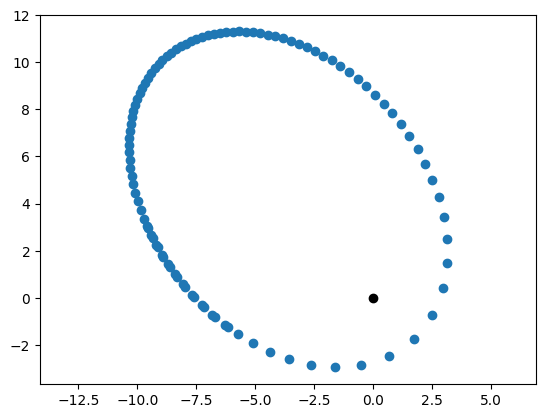

In [29]:
plt.scatter(*hm)
plt.axis("equal")
plt.scatter(0,0,c="k")